# VISIONS-2 analysis of LHSS 

### Load basic VISIONS-2 data

LOAD MAG: Currently low flyer only!
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD VLF: Currently low flyer only


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_44771/2468430602.py:75: RuntimeWarning: invalid value encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_44771/2468430602.py:75: RuntimeWarning: divide by zero encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_44771/2468430602.py:79: RuntimeWarning: invalid value encountered in double_scalars
  ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_44771/2468430602.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_44771/2468430602.py:83: RuntimeWarning: invalid val

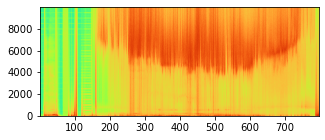

<IPython.core.display.Javascript object>

In [1]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import visions2_load_data
import visions2_plotting_functions
import numpy as np 
import matplotlib.pyplot as plt

%load_ext nb_black
plt.rcParams['figure.figsize'] = [5, 2]


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()


"""Load E-field DC data (low-flyer only)"""
edc = visions2_load_data.load_efieldDC()

"""Load particle data"""
#All particle data
#elec = visions2_load_data.load_particle("eea")
#ions = visions2_load_data.load_particle("eia")

#Sum over pitch angles
elecPerp = visions2_load_data.load_particle("eea",range=[70,110],sumtype=1)
ionsPerp = visions2_load_data.load_particle("eia",range=[70,110],sumtype=1)
elecDowngoing = visions2_load_data.load_particle("eea",range=[-20,20],sumtype=1)
ionsDowngoing = visions2_load_data.load_particle("eia",range=[-20,20],sumtype=1)
elecUpgoing = visions2_load_data.load_particle("eea",range=[147,180],sumtype=1)
ionsUpgoing = visions2_load_data.load_particle("eia",range=[147,180],sumtype=1)
#Sum over energies
elecLowE = visions2_load_data.load_particle("eea",range=[0,100],sumtype=2)
ionsLowE = visions2_load_data.load_particle("eia",range=[0,10],sumtype=2)
elecHigE = visions2_load_data.load_particle("eea",range=[200,200000],sumtype=2)
ionsHigE = visions2_load_data.load_particle("eia",range=[1000,30000],sumtype=2)



"""Load VLF data"""
vlfdata = visions2_load_data.load_vlf()
vlf12_lf = vlfdata["vlf12_lf"]

dvlf12_lf = vlf12_lf["dvlf12"]
times_vlf_lf = vlf12_lf["tvlf12"]

#sampling freq
sr_lf = [1/(times_vlf_lf[i+1]-times_vlf_lf[i]) for i in range(times_vlf_lf.size-1)]
fsVLF_lf = np.mean(sr_lf)
fsVLF = fsVLF_lf

"""Get spectral data - I only know how to do this by plotting, which is awkward"""
fig, axs = plt.subplots(1)
Sxx, specfreqs, spectimes, im = axs.specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo')
fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])


"""Create ratios of perp to parallel populations to see relative changes"""
ratioIDowngoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
ratioEDowngoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]
ratioIUpgoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
ratioEUpgoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])

for i in range(len(elecPerp["times"])):
    for j in range(len(elecPerp["energies"])):
        ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIUpgoing[i][j] = (ionsUpgoing["flux"][i,j])/(ionsPerp["flux"][i,j])

for i in range(len(elecPerp["times"])):
    for j in range(len(elecPerp["energies"])):
        ratioEUpgoing[i][j] = (elecUpgoing["flux"][i,j])/(elecPerp["flux"][i,j])





#### Create integrated line plots from spectra

In [4]:
smootime = 10. #smooth time in sec

vlfAmp_smoothed = visions2_plotting_functions.IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 3000, 10000, smootime)
eAmpPerp_smoothed = visions2_plotting_functions.IntegrateSpectra(elecPerp["flux"],elecPerp["times"],elecPerp["energies"],3,3000,smootime)
eAmpPar_smoothed = visions2_plotting_functions.IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],3,3000,smootime)
iAmpPerp_smoothed = visions2_plotting_functions.IntegrateSpectra(ionsPerp["flux"],ionsPerp["times"],ionsPerp["energies"],3,3000,smootime)
iAmpPar_smoothed = visions2_plotting_functions.IntegrateSpectra(ionsDowngoing["flux"],ionsDowngoing["times"],ionsDowngoing["energies"],3,3000,smootime)
eAmpLowE_smoothed = visions2_plotting_functions.IntegrateSpectra(elecLowE["flux"],elecLowE["times"],elecLowE["pitchangles"],-180,180,smootime)
eAmpHigE_smoothed = visions2_plotting_functions.IntegrateSpectra(elecHigE["flux"],elecHigE["times"],elecHigE["pitchangles"],-180,180,smootime)
iAmpLowE_smoothed = visions2_plotting_functions.IntegrateSpectra(ionsLowE["flux"],ionsLowE["times"],ionsLowE["pitchangles"],-180,180,smootime)
iAmpHigE_smoothed = visions2_plotting_functions.IntegrateSpectra(ionsHigE["flux"],ionsHigE["times"],ionsHigE["pitchangles"],-180,180,smootime)


<IPython.core.display.Javascript object>

### Get lower hybrid and other important frequencies

In [9]:

import plasma_params_get_flhr_freq

#Interpolate Langmuir probe density values to the time cadence of mag data. 
ne = np.interp(mag["times"], lp["lowflyer"]["times"], lp["lowflyer"]["ne"])

nH_ne = [0.] * np.size(mag["times"]) #fraction of H+
nO_ne = [1.] * np.size(mag["times"]) #fraction of O+


#First test applicability of high density limit. 
flhr_test = plasma_params_get_flhr_freq.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])

#flhr in high density limit for pure H+ and O+ plasmas
flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+

#flhr w/o high density assumption
flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)

#Lower hybrid frequency (not in high density limit) for full H+ and full O+
flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])

flh_interp = np.interp(spectimes, mag["times"], flhr_MassFrac)



/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:33: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(fce))]
/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:56: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))]
/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:70: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))] #Hz


<IPython.core.display.Javascript object>

LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


'\np=p+1\nsort = np.argsort(ionsLowE["pitchangles"])\nPlotParams = {"title":"EIAs low energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}\nPlotParticle(ionsLowE["times"],ionsLowE["pitchangles"][sort],ionsLowE["flux"][:,sort],p,**PlotParams)\np=p+1\nsort = np.argsort(ionsSuprathermalE["pitchangles"])\nPlotParams = {"title":"EIAs high energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}\nPlotParticle(ionsHigE["times"],ionsHigE["pitchangles"][sort],ionsHigE["flux"][:,sort],p,**PlotParams)\n'

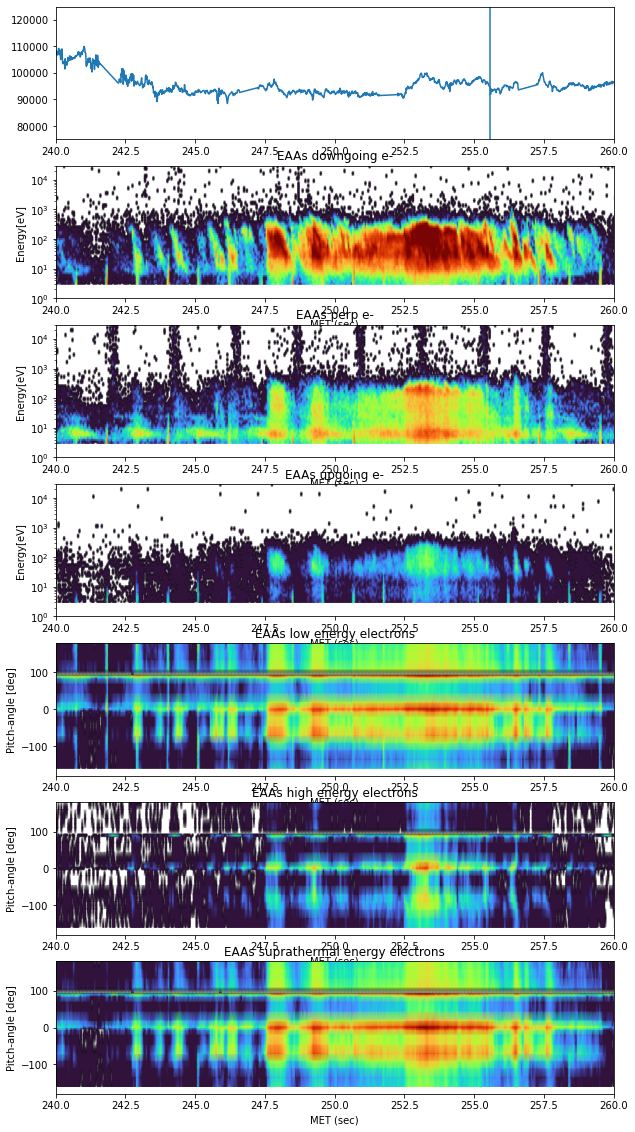

<IPython.core.display.Javascript object>

In [15]:
# Plot LHSS [Schuck+03] observed on low-flyer (t=255.58)
# -Density depletion observed in Langmuir Probe data
# -Assoc. with bursts of power just under (and above) LH freq. f<flhr is permitted by existence of Hall current in density cavity from linear theory (Schuck+03)
# -Seen near boundary of inverted-V structure, which is typical
# -Exists in presence of VLF wave energy near LH freq
# -Possible assoc. with burst of downgoing electrons

#NOTE: Any TAI would be subtle and would occur at energies of a few eV (Schuck03)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]

ionsSuprathermalE = visions2_load_data.load_particle("eia",range=[10,50000],sumtype=2)
elecSuprathermalE = visions2_load_data.load_particle("eea",range=[10,50000],sumtype=2)


fig, axs = plt.subplots(7)
lptimes = lp["lowflyer"]["times"]
density = lp["lowflyer"]["ne"]

p=0
axs[p].plot(lptimes, density)
axs[p].set_xlim(250,260)
axs[p].set_ylim(75000,125000)
#plt.axvline(x=255.58)
axs[p].axvline(x=255.58)  #Location of LHSS

"""
p=p+1
sort = np.argsort(ionsSuprathermalE["pitchangles"])
PlotParams = {"title":"EIAs suprathermal ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}
PlotParticle(ionsSuprathermalE["times"],ionsSuprathermalE["pitchangles"][sort],ionsSuprathermalE["flux"][:,sort],p,**PlotParams)
p=p+1
PlotParams = {"title":"EIAs upgoing ions", "yscale":"log", "ylim":[20,10000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"EIAs perp ions", "yscale":"log", "ylim":[20,10000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"EIAs downgoing ions", "yscale":"log", "ylim":[20,10000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ionsDowngoing["flux"],p,**PlotParams)
"""
p = p+1
PlotParams = {"title":"EAAs downgoing e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
PlotParticle(elecDowngoing["times"],elecDowngoing["energies"],elecDowngoing["flux"],p,axs,**PlotParams)
p=p+1
PlotParams = {"title":"EAAs perp e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
PlotParticle(elecPerp["times"],elecPerp["energies"],elecPerp["flux"],p,axs,**PlotParams)
p=p+1
PlotParams = {"title":"EAAs upgoing e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
PlotParticle(elecUpgoing["times"],elecUpgoing["energies"],elecUpgoing["flux"],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"EAAs low energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecHigE["pitchangles"])
PlotParams = {"title":"EAAs high energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
PlotParticle(elecHigE["times"],elecHigE["pitchangles"][sort],elecHigE["flux"][:,sort],p,axs,**PlotParams)
p=p+1
sort = np.argsort(elecSuprathermalE["pitchangles"])
PlotParams = {"title":"EAAs suprathermal energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
PlotParticle(elecSuprathermalE["times"],elecSuprathermalE["pitchangles"][sort],elecSuprathermalE["flux"][:,sort],p,axs,**PlotParams)


#for i in axs: i.set_xlim(200, 300)
for i in axs: i.set_xlim(240, 260)


